In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
nsmc_train_df = pd.read_csv('data/ratings_train.txt', 
                            encoding='utf8', 
                            sep='\t')
nsmc_train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [3]:
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [4]:
nsmc_train_df = nsmc_train_df[nsmc_train_df['document'].notnull()]
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [5]:
nsmc_train_df['label'].value_counts()

0    75170
1    74825
Name: label, dtype: int64

In [6]:
import re

nsmc_train_df['document'] = nsmc_train_df['document'].apply(lambda x : re.sub(r'[^ㄱ-ㅣ가-힣]+', ' ', x))
nsmc_train_df.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [7]:
nsmc_test_df = pd.read_csv('data/ratings_test.txt', 
                            encoding='utf8', 
                            sep='\t')
nsmc_test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [8]:
nsmc_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [9]:
# document 칼럼이 Null인 샘플 제거
nsmc_test_df = nsmc_test_df[nsmc_test_df['document'].notnull()]
nsmc_test_df['label'].value_counts()

1    25171
0    24826
Name: label, dtype: int64

In [10]:
nsmc_test_df['document'] = nsmc_test_df['document'].apply(lambda x : re.sub(r'[^ㄱ-ㅣ가-힣]+', ' ', x))
nsmc_test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0


In [11]:
from konlpy.tag import Okt
okt = Okt()

In [12]:
def okt_tokenizer(text):
    tokens = okt.morphs(text)
    return tokens

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer= okt_tokenizer, 
                        ngram_range=(1, 2), 
                        min_df=3, 
                        max_df=0.9)

tfidf.fit(nsmc_train_df['document'])
nsmc_train_tfidf = tfidf.transform(nsmc_train_df['document'])

In [14]:
from sklearn.linear_model import LogisticRegression
SA_lr = LogisticRegression(random_state = 0)

In [15]:
SA_lr.fit(nsmc_train_tfidf, nsmc_train_df['label'])

LogisticRegression(random_state=0)

In [16]:
from sklearn.model_selection import GridSearchCV # 머신러닝 모델 성능 향상

params = {'C': [1, 3, 3.5, 4, 4.5, 5]}
SA_lr_grid_cv = GridSearchCV(SA_lr, param_grid=params, cv=3, scoring='accuracy', verbose=1)

In [17]:
SA_lr_grid_cv.fit(nsmc_train_tfidf, nsmc_train_df['label'])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 3, 3.5, 4, 4.5, 5]}, scoring='accuracy',
             verbose=1)

In [18]:
print(SA_lr_grid_cv.best_params_, round(SA_lr_grid_cv.best_score_, 4))

{'C': 3} 0.8553


In [19]:
SA_lr_best = SA_lr_grid_cv.best_estimator_

In [20]:
# 평가용 데이터의 피처 벡터화
nsmc_test_tfidf = tfidf.transform(nsmc_test_df['document'])

In [21]:
test_predict = SA_lr_best.predict(nsmc_test_tfidf)

In [22]:
from sklearn.metrics import accuracy_score
print('감성 분석 정확도 :', round(accuracy_score(nsmc_test_df['label'], test_predict), 3))

감성 분석 정확도 : 0.858


In [23]:
st = input('감성 분석 할 문장 입력 >> ') # 웃자 ^o^ 오늘은 좋은 날이 될 것 같은 예감100%! ^^*

감성 분석 할 문장 입력 >>  # 웃자 ^o^ 오늘은 좋은 날이 될 것 같은 예감100%! ^^*


In [24]:
# 0) 입력 테스트에 대한 전처리 수행
st = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(st)
print(st)
st = [" ".join(st)]
print(st)

['웃자', '오늘은', '좋은', '날이', '될', '것', '같은', '예감']
['웃자 오늘은 좋은 날이 될 것 같은 예감']


In [25]:
# 1) 입력 텍스트의 피처 벡터화
st_tfidf = tfidf.transform(st)
# 2) 최적 감성 분석 모델에 적용하여 감성 분석 평가
st_predict = SA_lr_best.predict(st_tfidf)

In [26]:
# 3) 예측값 출력
if(st_predict==0):
    print(st, '->> 부정 감성')
else:
    print(st, '->> 긍정 감성')

['웃자 오늘은 좋은 날이 될 것 같은 예감'] ->> 긍정 감성


# 2) 감성 분석 + 차트(json)

In [27]:
import json

file_name = 'synopses'
with open('data/'+file_name+'.json', encoding='utf8') as j_f:
    data = json.load(j_f)

In [28]:
print(data)

[{'synopsis': '미래, 인류와 기계의 전쟁은 계속 되는 가운데 스카이넷은 인류 저항군 사령관 존 코너를 없애기 위해 액체 금속형 로봇인 T-1000(로버트 패트릭)을 과거의 어린 존 코너에게로 보낸다. 형태의 변신과 자가 치유까지 가능한 T-1000에 대항하고 존 코너를 지키기 위해 인류 저항군은 T-101 (아놀드 슈왈제네거)을 과거로 급파한다. 미래의 인류 운명을 쥔 어린 존 코너, 그를 구해내지 않으면 인류의 미래는 없다. 반드시 제거해야 하는 스카이넷의 T-1000은 거침없이 존 코너 일행을 위협하며 숨가쁜 추격을 시작하는데...', 'rating': '9.39', 'title_en': 'Terminator 2: Judgment Day, 1991', 'title_kr': '터미네이터 2'}, {'synopsis': '촉망받는 은행 간부 앤디 듀프레인(Andy Dufresne: 팀 로빈슨 분)은 아내와 그녀의 정부를 살해했다는 누명을 쓴다. 주변의 증언과 살해 현장의 그럴듯한 증거들로 그는 종신형을 선고받고 악질범들만 수용한다는 지옥같은 교도소 쇼생크로 향한다.\r', 'rating': '9.37', 'title_en': 'The Shawshank Redemption, 1994', 'title_kr': '쇼생크 탈출'}, {'synopsis': '한 손엔 우유 2팩이 든 가방, 다른 한 손엔 화분을 들고 뿌리 없이 떠도는 킬러 레옹은 어느 날 옆 집 소녀 마틸다의 일가족이 몰살 당하는 것을 목격한다. 그 사이 심부름을 갔다 돌아 온 마틸다는 가족들이 처참히 몰살 당하자 레옹에게 도움을 청한다. 가족의 원수를 갚기 위해 킬러가 되기로 결심한 12세 소녀 마틸다는 레옹에게 글을 알려주는 대신 복수하는 법을 배우게 된다. 드디어 그녀는 가족을 죽인 사람이 부패 마약 경찰 스탠스임을 알게 되고, 그의 숙소로 향하게 되는데…', 'rating': '9.37', 'title_en': 'Leon, 1994', 'title_kr': '레옹'}, {'synop

In [29]:
data_title=[]
data_description=[]
for i in data:
    data_title.append(i['title_kr'])
    data_description.append(i['synopsis'])

In [30]:
data_title

['터미네이터 2',
 '쇼생크 탈출',
 '레옹',
 '센과 치히로의 행방불명',
 '인생은 아름다워',
 '죽은 시인의 사회',
 '백 투 더 퓨쳐',
 '토이 스토리 3',
 '포레스트 검프',
 '반지의 제왕: 왕의 귀환',
 '매트릭스',
 '월-E',
 '나 홀로 집에',
 '사운드 오브 뮤직',
 '에이리언 2',
 '굿바이 마이 프랜드',
 '울지마 톤즈',
 '살인의 추억',
 '세 얼간이',
 '미세스 다웃파이어',
 '라이언 일병 구하기',
 '헬프',
 '아기공룡 둘리 - 얼음별 대모험',
 '패왕별희',
 '드래곤 길들이기',
 '반지의 제왕: 두 개의 탑',
 '소원',
 '언터처블: 1%의 우정',
 '클래식',
 '그대를 사랑합니다',
 '여인의 향기',
 '모노노케 히메',
 '위대한 독재자',
 '아이언 자이언트',
 '글래디에이터',
 '라푼젤',
 '집으로...',
 '오페라의 유령 : 25주년 특별 공연',
 '모던 타임즈',
 '세상에서 가장 아름다운 이별',
 '타잔',
 '바이센테니얼 맨',
 '인어 공주',
 '프리퀀시',
 '캐스트 어웨이',
 '코러스',
 '스피릿',
 '빌리 엘리어트 뮤지컬 라이브',
 '쉰들러 리스트',
 '해리 포터와 죽음의 성물 - 2부']

In [31]:
data_description

['미래, 인류와 기계의 전쟁은 계속 되는 가운데 스카이넷은 인류 저항군 사령관 존 코너를 없애기 위해 액체 금속형 로봇인 T-1000(로버트 패트릭)을 과거의 어린 존 코너에게로 보낸다. 형태의 변신과 자가 치유까지 가능한 T-1000에 대항하고 존 코너를 지키기 위해 인류 저항군은 T-101 (아놀드 슈왈제네거)을 과거로 급파한다. 미래의 인류 운명을 쥔 어린 존 코너, 그를 구해내지 않으면 인류의 미래는 없다. 반드시 제거해야 하는 스카이넷의 T-1000은 거침없이 존 코너 일행을 위협하며 숨가쁜 추격을 시작하는데...',
 '촉망받는 은행 간부 앤디 듀프레인(Andy Dufresne: 팀 로빈슨 분)은 아내와 그녀의 정부를 살해했다는 누명을 쓴다. 주변의 증언과 살해 현장의 그럴듯한 증거들로 그는 종신형을 선고받고 악질범들만 수용한다는 지옥같은 교도소 쇼생크로 향한다.\r',
 '한 손엔 우유 2팩이 든 가방, 다른 한 손엔 화분을 들고 뿌리 없이 떠도는 킬러 레옹은 어느 날 옆 집 소녀 마틸다의 일가족이 몰살 당하는 것을 목격한다. 그 사이 심부름을 갔다 돌아 온 마틸다는 가족들이 처참히 몰살 당하자 레옹에게 도움을 청한다. 가족의 원수를 갚기 위해 킬러가 되기로 결심한 12세 소녀 마틸다는 레옹에게 글을 알려주는 대신 복수하는 법을 배우게 된다. 드디어 그녀는 가족을 죽인 사람이 부패 마약 경찰 스탠스임을 알게 되고, 그의 숙소로 향하게 되는데…',
 '금지된 세계의 문이 열렸다! \r',
 '이탈리아에서 극악한 파시즘이 맹위를 떨치던 1930년대말, 귀도(Guido Orefice: 로베르토 베니니 분)는 운명처럼 초등학교 교사인 도라(Dora: 니콜렛타 브라스키 분)를 만난다. 도라에겐 약혼자가 있지만 그 사랑을 운명이라고 생각한 귀도는 그녀와 함께 마을을 도망친다. 귀도의 순수하고 맑은 인생관과 꾸밈없는 유머에 이끌렸던 도라는 그와 결혼하여 아들 조슈아를 얻는다. 평화롭기 그지없던 이들 가족에게 닥쳐온 불행, 독일의 유태인 말살 정책에 따라 귀도

In [32]:
data_df = pd.DataFrame({'title':data_title, 'description':data_description})

In [33]:
data_df['title'] = data_df['title'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))
data_df['description'] = data_df['description'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))
data_df.head()  #작업 확인용 출력

,title,description
0,터미네이터,미래 인류와 기계의 전쟁은 계속 되는 가운데 스카이넷은 인류 저항군 사령관 존 코...
1,쇼생크 탈출,촉망받는 은행 간부 앤디 듀프레인 팀 로빈슨 분 은 아내와 그녀의 정부를 살해...
2,레옹,한 손엔 우유 팩이 든 가방 다른 한 손엔 화분을 들고 뿌리 없이 떠도는 킬러 ...
3,센과 치히로의 행방불명,금지된 세계의 문이 열렸다
4,인생은 아름다워,이탈리아에서 극악한 파시즘이 맹위를 떨치던 년대말 귀도 로베르토 베니니 분...


In [34]:
# 1) 분석할 데이터의 피처 벡터화 title 분석
data_title_tfidf = tfidf.transform(data_df['title'])
# 2) 최적 매개변수 학습 모델에 적용하여 감성 분석
data_title_predict = SA_lr_best.predict(data_title_tfidf)
# 3) 감성 분석 결과값을 데이터프레임에 저장
data_df['title_label'] = data_title_predict

In [35]:
# 1) 분석할 데이터의 피처 벡터화 description 분석
data_description_tfidf = tfidf.transform(data_df['description'])
# 2) 최적 매개변수 학습 모델에 적용하여 감성 분석
data_description_predict = SA_lr_best.predict(data_description_tfidf)
# 3) 감성 분석 결과값을 데이터프레임에 저장
data_df['description_label'] = data_description_predict

In [36]:
st = data_df['description'][1]
st

'촉망받는 은행 간부 앤디 듀프레인    팀 로빈슨 분 은 아내와 그녀의 정부를 살해했다는 누명을 쓴다  주변의 증언과 살해 현장의 그럴듯한 증거들로 그는 종신형을 선고받고 악질범들만 수용한다는 지옥같은 교도소 쇼생크로 향한다 '

In [37]:
# 0) 입력 테스트에 대한 전처리 수행
st = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(st)
print(st)
st = [" ".join(st)]
print(st)

['촉망받는', '은행', '간부', '앤디', '듀프레인', '팀', '로빈슨', '분', '은', '아내와', '그녀의', '정부를', '살해했다는', '누명을', '쓴다', '주변의', '증언과', '살해', '현장의', '그럴듯한', '증거들로', '그는', '종신형을', '선고받고', '악질범들만', '수용한다는', '지옥같은', '교도소', '쇼생크로', '향한다']
['촉망받는 은행 간부 앤디 듀프레인 팀 로빈슨 분 은 아내와 그녀의 정부를 살해했다는 누명을 쓴다 주변의 증언과 살해 현장의 그럴듯한 증거들로 그는 종신형을 선고받고 악질범들만 수용한다는 지옥같은 교도소 쇼생크로 향한다']


In [38]:
# 1) 입력 텍스트의 피처 벡터화
st_tfidf = tfidf.transform(st)
# 2) 최적 감성 분석 모델에 적용하여 감성 분석 평가
st_predict = SA_lr_best.predict(st_tfidf)

In [39]:
# 3) 예측값 출력
if(st_predict==0):
    print(st, '->> 부정 감성')
else:
    print(st, '->> 긍정 감성')

['촉망받는 은행 간부 앤디 듀프레인 팀 로빈슨 분 은 아내와 그녀의 정부를 살해했다는 누명을 쓴다 주변의 증언과 살해 현장의 그럴듯한 증거들로 그는 종신형을 선고받고 악질범들만 수용한다는 지옥같은 교도소 쇼생크로 향한다'] ->> 부정 감성


In [40]:
data_df.to_csv('data/'+file_name+'.csv', encoding='euc-kr')

In [41]:
data_df.head()

,title,description,title_label,description_label
0,터미네이터,미래 인류와 기계의 전쟁은 계속 되는 가운데 스카이넷은 인류 저항군 사령관 존 코...,1,1
1,쇼생크 탈출,촉망받는 은행 간부 앤디 듀프레인 팀 로빈슨 분 은 아내와 그녀의 정부를 살해...,0,0
2,레옹,한 손엔 우유 팩이 든 가방 다른 한 손엔 화분을 들고 뿌리 없이 떠도는 킬러 ...,0,1
3,센과 치히로의 행방불명,금지된 세계의 문이 열렸다,1,1
4,인생은 아름다워,이탈리아에서 극악한 파시즘이 맹위를 떨치던 년대말 귀도 로베르토 베니니 분...,1,1


In [42]:
data_df['title_label'].value_counts()

0    27
1    23
Name: title_label, dtype: int64

In [43]:
data_df['description_label'].value_counts()

1    40
0    10
Name: description_label, dtype: int64

In [44]:
columns_name = ['title', 'title_label', 'description', 'description_label']
NEG_data_df = pd.DataFrame(columns=columns_name)
POS_data_df = pd.DataFrame(columns=columns_name)

for i, data in data_df.iterrows():
    title = data['title']
    description = data['description']
    t_label = data['title_label']
    d_label = data['description_label']
    
    if d_label==0: # 부정 감성 샘플만 추출
        NEG_data_df = NEG_data_df.append(pd.DataFrame([[title, t_label, description, d_label]], 
                                                      columns=columns_name), ignore_index=True)
    else: # 긍정 감성 샘플만 추출
         POS_data_df = POS_data_df.append(pd.DataFrame([[title, t_label, description, d_label]], 
                                                      columns=columns_name), ignore_index=True)
# 파일에 저장
NEG_data_df.to_csv('data/'+file_name+'_NES.csv', encoding = 'euc-kr')
POS_data_df.to_csv('data/'+file_name+'_POS.csv', encoding = 'euc-kr')

In [45]:
len(NEG_data_df), len(POS_data_df)

(10, 40)

In [46]:
POS_description = POS_data_df['description']

POS_description_noun_tk=[]

for d in POS_description:
    POS_description_noun_tk.append(okt.nouns(d)) # 명사 형태소만 추출
POS_description_noun_tk

[['미래',
  '인류',
  '기계',
  '전쟁',
  '계속',
  '가운데',
  '스카이',
  '넷',
  '인류',
  '저항',
  '사령관',
  '존',
  '코너',
  '위해',
  '액체',
  '금속',
  '로봇',
  '로버트',
  '패',
  '트릭',
  '과거',
  '존',
  '코너',
  '형태',
  '변신',
  '자가',
  '치유',
  '대항',
  '존',
  '코너',
  '위해',
  '인류',
  '저항',
  '아놀드',
  '슈왈제네거',
  '과거',
  '급파',
  '미래',
  '인류',
  '운명',
  '존',
  '코너',
  '그',
  '구',
  '인류',
  '미래',
  '반드시',
  '제거',
  '스카이',
  '넷',
  '은',
  '존',
  '코너',
  '일행',
  '위협',
  '추격',
  '시작'],
 ['손',
  '우유',
  '팩',
  '가방',
  '다른',
  '손',
  '화분',
  '뿌리',
  '도',
  '킬러',
  '레옹',
  '날',
  '옆',
  '집',
  '소녀',
  '마틸다',
  '가족',
  '몰살',
  '것',
  '목격',
  '그',
  '사이',
  '심부름',
  '온',
  '마틸다',
  '가족',
  '몰살',
  '레옹',
  '도움',
  '청',
  '가족',
  '원수',
  '위해',
  '킬러',
  '결심',
  '세',
  '소녀',
  '마틸다',
  '레옹',
  '글',
  '대신',
  '복수',
  '법',
  '그녀',
  '가족',
  '사람',
  '부패',
  '마약',
  '경찰',
  '스탠',
  '스임',
  '알',
  '그',
  '숙소',
  '향'],
 ['금지', '세계', '문'],
 ['이탈리아',
  '파시즘',
  '맹위',
  '년대',
  '말',
  '귀',
  '로베르토',
  '베니',
  '분',
  '운명',
  '초등학교',
  '교

In [47]:
POS_description_noun_join=[]

for d in POS_description_noun_tk:
    d2 = [w for w in d if len(w) > 1] #길이가 1보다 큰 토큰만 추출
    POS_description_noun_join.append(" ".join(d2)) # 토큰 연결하여 리스트 구성
POS_description_noun_join

['미래 인류 기계 전쟁 계속 가운데 스카이 인류 저항 사령관 코너 위해 액체 금속 로봇 로버트 트릭 과거 코너 형태 변신 자가 치유 대항 코너 위해 인류 저항 아놀드 슈왈제네거 과거 급파 미래 인류 운명 코너 인류 미래 반드시 제거 스카이 코너 일행 위협 추격 시작',
 '우유 가방 다른 화분 뿌리 킬러 레옹 소녀 마틸다 가족 몰살 목격 사이 심부름 마틸다 가족 몰살 레옹 도움 가족 원수 위해 킬러 결심 소녀 마틸다 레옹 대신 복수 그녀 가족 사람 부패 마약 경찰 스탠 스임 숙소',
 '금지 세계',
 '이탈리아 파시즘 맹위 년대 로베르토 베니 운명 초등학교 교사 니콜 렛타 브라 스키 약혼자 사랑 운명 생각 그녀 마을 도의 맑은 인생관 꾸밈 유머 결혼 아들 조슈아 가족 불행 독일 유태인 말살 정책 조슈아 강제 용소 간다',
 '파이프 연주 교기 학생 강당 창립 명문 웰튼 고등학교 학기 개강 식이 시작 학교 전학 토드 에단 호크 신입생 마찬가지 가슴',
 '밸리 주인공 마티 맥플라이 마이클 폭스 록큰롤 스케이트보드 자동차 명랑 고교생 아버지 죠지 크리 스핀 글로버 어머니 로레인 리아 톰슨 누나 가정 청소년 평소 발명가 에메트 브라운 박사 크리스토퍼 이드 스포츠카 리안 개조 타임머신 뜻밖 사고 브라운 박사 테러범 마티 간다',
 '모든 장난감 가장 바로 주인 이상 자신 우디 버즈 위기 앤디 대학 진학 불안 토이 앤디 엄마 실수 우여곡절 탁아소 기증 신세',
 '포레스트 검프 마이클 코너 프레 이스 행크스 아이큐 어머니 필드 아들 교육 성적 다리 포레스트 다른 아이 교육 기회 주기 위해 무엇 희생 남부 여인 포레스트 보통 사람 자기 해주 나중 동반 친구 제니 로빈 라이트 학교 악동 장난 피해 포레스트 바람 소질 보이 그로 고등학교 미식축구 선수 가게 대학 축구 선수 로서 입학',
 '절대반지 파괴 위해 프로도 친구 엘프 레골라스 난쟁이 명의 인간 전사 아라곤 보로 미르 마법사 간달프 반지원정대 불의 사우론 세력 다시 뿔뿔이 암흑세계 통합 세력 확장 사우론 서서히 

In [48]:
NEG_description = NEG_data_df['description']

NEG_description_noun_tk=[]
NEG_description_noun_join=[]

for d in NEG_description:
    NEG_description_noun_tk.append(okt.nouns(d)) # 명사 형태소만 추출

for d in NEG_description_noun_tk:
    d2 = [w for w in d if len(w) > 1] #길이가 1보다 큰 토큰만 추출
    NEG_description_noun_join.append(" ".join(d2)) # 토큰 연결하여 리스트 구성

NEG_description_noun_join

['촉망 은행 간부 앤디 듀프레 로빈슨 아내 그녀 정부 살해 누명 주변 증언 살해 현장 증거 종신형 선고 악질 수용 지옥 교도소 쇼생',
 '왕성 호기심 제법 의협 에릭 브래드 렌프 이혼 엄마 불치 옆집 소년 덱스터 젤로 친구 덱스터 아이 수혈 에이즈 감염 치료 발견 운명 할아버지 죽음 대한 공포',
 '경기도 여인 무참 강간 살해 시체 발견 개월 수법 강간 살인 사건 발생 사건 세간 주목 시작 일대 연쇄살인 범죄 공포',
 '주간 내기 시작 상상 초월 동거 스토리',
 '백년 야마토 조정 싸움 북쪽 변방 생활 에미시 마을 부근 갑자기 가미 재앙 인간 대한 증오 원망 가득 가미 마을 돌진 에미시 차기 족장 아시 타카 마수 요지 목소리 마을 위해 재앙 재앙 아시 타카 대가 죽음 각인 죽음 저주',
 '세계대전 매니아 힌켈 독재자 악명',
 '기차 타고 버스 타고 먼지 시골 한참 엄마 상우 할머니 형편 상우 엄마 잠시 상우 외할머니 외할머니 혼자 시골 상우 전자 오락 기와 롤러블레이드 세상 아이 빳데리 팔지 시골 가게 사방 투성이 시골 마당 깜깜 뒷간 생애 최초 시련',
 '파리 오페라 하우스 단주 앙드레 피르맹 후원자 라울 백작 한니발 리허설 감상 가운데 갑자기 무대 치가 사고 발생 사람 오페라 유령 화가 프리마돈나 칼롯 무대',
 '공장 하루 종일 나사못 찰리',
 '병원 신경 가장 김갑수']

In [49]:
POS_tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, min_df=2)
POS_dtm = POS_tfidf.fit_transform(POS_description_noun_join)

In [50]:
POS_vocab = dict()
for idx, word in enumerate(POS_tfidf.get_feature_names()):
    POS_vocab[word] = POS_dtm.getcol(idx).sum()

POS_words = sorted(POS_vocab.items(), key = lambda x: x[1], reverse=True)
POS_words

[('가족', 2.6000963000071904),
 ('아버지', 2.3873338253133056),
 ('자신', 2.1418687212384597),
 ('사랑', 1.9239071201431464),
 ('아이', 1.8328575422639262),
 ('모든', 1.8105041255887833),
 ('세계', 1.776496184665611),
 ('시작', 1.6551655201231963),
 ('학교', 1.6371959596650143),
 ('그녀', 1.6230260794333236),
 ('위해', 1.587191156139495),
 ('가장', 1.4028666307143685),
 ('대학', 1.3222183793205855),
 ('생각', 1.2550044514106795),
 ('인간', 1.2468296329760178),
 ('기적', 1.2293147918751348),
 ('사람', 1.2135924790485975),
 ('세상', 1.206285008105894),
 ('엄마', 1.2055021312790215),
 ('아기', 1.1832816698532747),
 ('이름', 1.1588311572010188),
 ('미국', 1.1582273908529903),
 ('마을', 1.129633732418015),
 ('간다', 1.0415783126360942),
 ('두려움', 1.037107794440047),
 ('유태인', 1.008273459123829),
 ('바로', 0.9966612486722993),
 ('명문', 0.9475783507446287),
 ('로봇', 0.9395890633448843),
 ('말썽', 0.9386467793317501),
 ('친구', 0.9042464421487841),
 ('소년', 0.8986233314522989),
 ('남부', 0.8916106531619807),
 ('아프리카', 0.871314882659523),
 ('지배', 0.867179

In [51]:
NEG_tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, min_df=2)
NEG_dtm = NEG_tfidf.fit_transform(NEG_description_noun_join)

In [52]:
NEG_vocab = dict()
for idx, word in enumerate(NEG_tfidf.get_feature_names()):
    NEG_vocab[word] = NEG_dtm.getcol(idx).sum()

NEG_words = sorted(NEG_vocab.items(), key = lambda x: x[1], reverse=True)
NEG_words

[('살해', 1.4472135954999579),
 ('시작', 1.4472135954999579),
 ('엄마', 1.3026754814637789),
 ('죽음', 1.2247448713915892),
 ('발생', 1.1543203766865056),
 ('갑자기', 1.1153550716504106),
 ('공포', 0.855461885963821),
 ('발견', 0.855461885963821),
 ('아이', 0.855461885963821),
 ('대한', 0.816496580927726)]

In [53]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = 'c:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
max=10

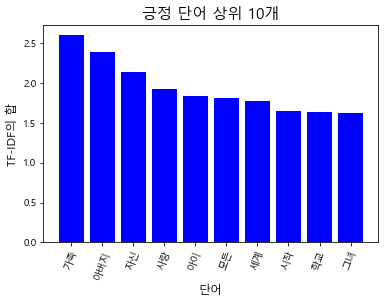

In [54]:
plt.bar(range(max), [i[1] for i in POS_words[:max]], color='blue')
plt.title('긍정 단어 상위 %d개'%max, fontsize=15)
plt.xlabel('단어', fontsize=12)
plt.ylabel('TF-IDF의 합', fontsize=12)
plt.xticks(range(max), [i[0] for i in POS_words[:max]], rotation=70)
plt.show()

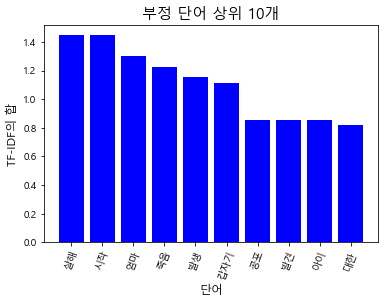

In [55]:
plt.bar(range(max), [i[1] for i in NEG_words[:max]], color='blue')
plt.title('부정 단어 상위 %d개'%max, fontsize=15)
plt.xlabel('단어', fontsize=12)
plt.ylabel('TF-IDF의 합', fontsize=12)
plt.xticks(range(max), [i[0] for i in NEG_words[:max]], rotation=70)

plt.show()

# 3) 토픽 분석 + LDA 토픽 모델

In [56]:
description = data_df['description']
description_noun_tk=[]
description_noun_tk2=[]

for d in description:
    description_noun_tk.append(okt.nouns(d)) # 명사 형태소만 추출

for d in description_noun_tk:
    item = [i for i in d if len(i) > 1] # 토큰 길이가 1보다 큰 것만 추출
    description_noun_tk2.append(item)

print(description_noun_tk2)

[['미래', '인류', '기계', '전쟁', '계속', '가운데', '스카이', '인류', '저항', '사령관', '코너', '위해', '액체', '금속', '로봇', '로버트', '트릭', '과거', '코너', '형태', '변신', '자가', '치유', '대항', '코너', '위해', '인류', '저항', '아놀드', '슈왈제네거', '과거', '급파', '미래', '인류', '운명', '코너', '인류', '미래', '반드시', '제거', '스카이', '코너', '일행', '위협', '추격', '시작'], ['촉망', '은행', '간부', '앤디', '듀프레', '로빈슨', '아내', '그녀', '정부', '살해', '누명', '주변', '증언', '살해', '현장', '증거', '종신형', '선고', '악질', '수용', '지옥', '교도소', '쇼생'], ['우유', '가방', '다른', '화분', '뿌리', '킬러', '레옹', '소녀', '마틸다', '가족', '몰살', '목격', '사이', '심부름', '마틸다', '가족', '몰살', '레옹', '도움', '가족', '원수', '위해', '킬러', '결심', '소녀', '마틸다', '레옹', '대신', '복수', '그녀', '가족', '사람', '부패', '마약', '경찰', '스탠', '스임', '숙소'], ['금지', '세계'], ['이탈리아', '파시즘', '맹위', '년대', '로베르토', '베니', '운명', '초등학교', '교사', '니콜', '렛타', '브라', '스키', '약혼자', '사랑', '운명', '생각', '그녀', '마을', '도의', '맑은', '인생관', '꾸밈', '유머', '결혼', '아들', '조슈아', '가족', '불행', '독일', '유태인', '말살', '정책', '조슈아', '강제', '용소', '간다'], ['파이프', '연주', '교기', '학생', '강당', '창립', '명문', '웰튼', '고등학교', '학기', '개강', '식이', '시작', '

In [57]:
# !pip install gensim

In [58]:
import gensim
import gensim.corpora as corpora

dictionary = corpora.Dictionary(description_noun_tk2)
dictionary[1]

'계속'

In [59]:
corpus = [dictionary.doc2bow(word) for word in description_noun_tk2]
print(corpus)

[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 3), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 5), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 5), (30, 1), (31, 1)], [(32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)], [(19, 1), (34, 1), (54, 1), (55, 4), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 3), (62, 1), (63, 3), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1)], [(80, 1), (81, 1)], [(18, 2), (34, 1), (55, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105,

In [60]:
k = 4
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus, 
                                                    iterations=12, 
                                                    num_topics=k, 
                                                    id2word=dictionary, 
                                                    passes=1, 
                                                    workers=10)
print(lda_model.print_topics(num_topics=k, num_words=15))

[(0, '0.006*"아이" + 0.006*"위해" + 0.006*"아버지" + 0.006*"가족" + 0.005*"자신" + 0.004*"매트릭스" + 0.004*"시작" + 0.004*"인간" + 0.004*"엄마" + 0.004*"드래곤" + 0.003*"마을" + 0.003*"사랑" + 0.003*"다니엘" + 0.003*"인류" + 0.003*"사람"'), (1, '0.008*"매트릭스" + 0.008*"인간" + 0.005*"현실" + 0.005*"가족" + 0.005*"위해" + 0.004*"아버지" + 0.004*"아이" + 0.004*"세계" + 0.004*"마을" + 0.003*"자신" + 0.003*"가장" + 0.003*"시작" + 0.003*"그녀" + 0.003*"가상" + 0.003*"학교"'), (2, '0.006*"가족" + 0.005*"위해" + 0.005*"아이" + 0.005*"자신" + 0.004*"학교" + 0.004*"아버지" + 0.004*"인간" + 0.004*"가장" + 0.004*"엄마" + 0.004*"시작" + 0.004*"사람" + 0.004*"스피릿" + 0.004*"매트릭스" + 0.004*"세상" + 0.003*"사건"'), (3, '0.006*"위해" + 0.006*"아버지" + 0.006*"가족" + 0.006*"그녀" + 0.005*"아이" + 0.005*"자신" + 0.005*"시작" + 0.005*"인간" + 0.004*"사랑" + 0.004*"다니엘" + 0.004*"마녀" + 0.003*"세상" + 0.003*"매트릭스" + 0.003*"인류" + 0.003*"엄마"')]


In [61]:
# !pip install pyLDAvis

In [62]:
# utf-8 설정
import os
os.environ['PYTHONIOENCODING'] = 'utf-8'

import pyLDAvis.gensim_models

lda_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

In [63]:
pyLDAvis.display(lda_vis)

C:\Users\admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
